# » `Dependencias`:

In [ ]:
# !pip install plotly
# !pip install sqlalchemy
# !pip install numpy
# !pip install matplotlib

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import re
# import cufflinks as cf
# from IPython.display import display, HTML

# cf.set_config_file

## 1. Conección → SIM(172.27.0.124)

In [5]:
# spring.datasource.url = jdbc:sqlserver://172.27.250.27;databaseName=SIRIM
SERVER = '172.27.0.242' #'172.27.0.124'
#DRIVER = 'SQL Server Native Client 11.0'
DRIVER = 'ODBC Driver 17 for SQL Server'
DATABASE = 'SIM'
USERNAME = 'udesa' # userestadistica
PASSWORD = 'DESARROLLO2006' # $Us3R_3sT4d1sTic4$
DATABASE_CONNECTION = f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'

engine = create_engine(DATABASE_CONNECTION)
connection = engine.connect()

## 2. Métodos genérico:

In [6]:
def get_query_sql(query):
  try:
    df = pd.read_sql(query, connection)
    return df
  except:
    print('¡Ocurrió un error!')

## 3. Visualización de datos: `INF-JUN2024`

### 3.1 Tipo movimiento migratorio en `SIM.dbo.SimMovMigra`, distinto a tipo de movimiento registrado en `SIM.dbo.SimItinerario`.

In [22]:
# Extracción
df_1 = pd.read_excel('./anexos/A1.xlsx')

18489

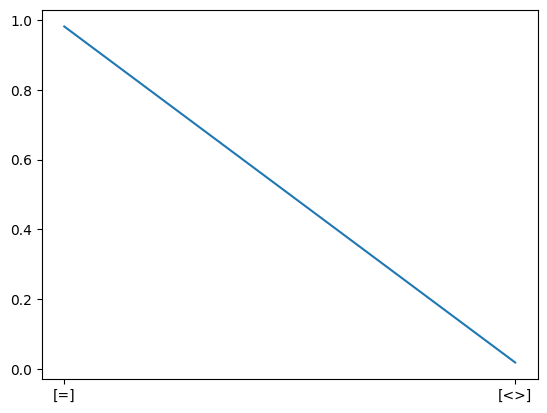

In [23]:
# Campos: ['Id Persona', 'sIdMovMigratorio', 'sTipo', 'sIdItinerario', 'Tipo Movimiento(SimItinerario)']

muestra = 1000000
indexs = ['[=]', '[<>]']

margen_error = len(df_1)
tasa_exito = (muestra - margen_error)

df_1_f = pd.DataFrame(data=[tasa_exito / muestra, margen_error /  muestra], index=indexs, columns=['Total'])
df_1_f = df_1_f.plot(legend=False, xlabel='')
df_1_f.set_xticks(ticks=[0, 1])
df_1_f.set_xticklabels(labels=indexs)

### 3.2 Pais procedencia o destino en `SIM.dbo.SimMovMigra`, distinto a Pais de procedencia o destino en `SIM.dbo.SimItinerario` ...

In [17]:
df_2 = pd.read_excel('./anexos/A2.xlsx')

27581

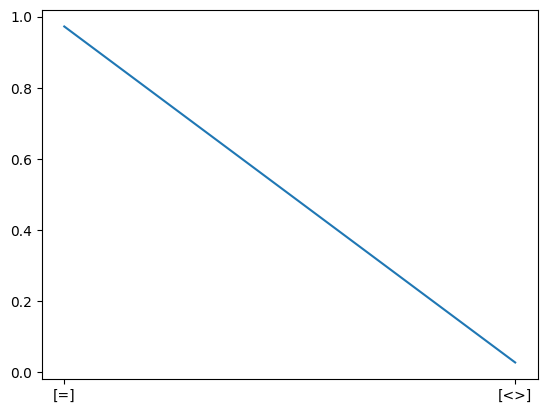

In [24]:
muestra = 1000000
indexs = ['[=]', '[<>]']

margen_error = len(df_2)
tasa_exito = (muestra - margen_error)

df_2_f = pd.DataFrame(data=[tasa_exito / muestra, margen_error /  muestra], index=indexs, columns=['Total'])
df_2_f = df_2_f.plot(legend=False, xlabel='')
df_2_f.set_xticks(ticks=[0, 1])
df_2_f.set_xticklabels(labels=indexs)

### 3.3 Distintos ciudadanos `PERUANOS`, registran igual número de pasaporte electrónico en Control Migratorio ...

In [28]:
df_3 = pd.read_excel('./anexos/A3.xlsx')

[Text(3, 0, '[(3) Vinc.]'), Text(2, 0, '[(2) Vinc.]')]

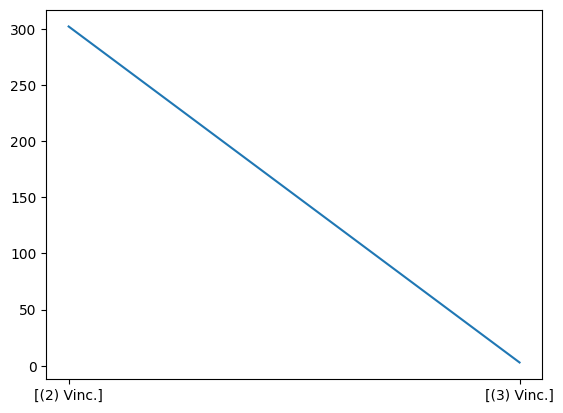

In [30]:
# ['Id Persona', 'Id Mov Migratorio', 'Número Documeno Viaje']

df_3_f_1 = df_3.groupby(by=['Número Documeno Viaje']).agg({ 'Id Persona': 'count' }) \
               .reset_index() \
               .rename(columns={ 'Id Persona': 'Vinculaciones' })
         
df_3_f_2 = df_3_f_1[df_3_f_1['Vinculaciones'] > 1].groupby(by='Vinculaciones').agg({ 'Número Documeno Viaje': [np.ma.count] }) \
                                                  .droplevel(level=0, axis=1)
                                               
df_3_f = df_3_f_2.plot(legend=False, xlabel='')
df_3_f.set_xticks(ticks=[3, 2])
df_3_f.set_xticklabels(labels=['[(3) Vinc.]', '[(2) Vinc.]'])


### 3.4 Distintos ciudadanos extranjeros, registran igual número de C.E en `SIM.dbo.SimCarnetExtranjeria` ...

In [31]:
df_4 = pd.read_excel('./anexos/A4.xlsx')

8

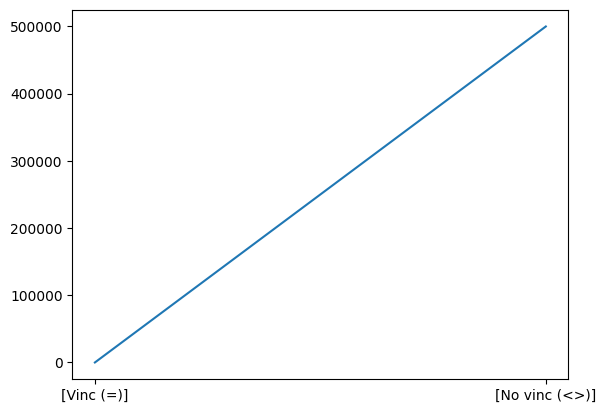

In [33]:
# ['Id Persona', 'Número Trámite', 'Número Carnet']

muestra = 500000
indexs = ['[Vinc (=)]', '[No vinc (<>)]']

margen_error = len(df_4)
tasa_exito = (muestra - margen_error)

df_4_f = pd.DataFrame(data=[margen_error, tasa_exito], index=indexs, columns=['Total'])
df_4_f = df_4_f.plot(legend=False, xlabel='')
df_4_f.set_xticks(ticks=[0, 1])
df_4_f.set_xticklabels(labels=indexs)

### 3.5 Ciudadanos de nacionalidad `PERUANA` con más de 1 pasaporte, no registran trámite de `ANULACIÓN DE PASAPORTE` en relación al pasaporte anterior ...

In [41]:
df_5 = pd.read_excel('./anexos/A5.xlsx')
len(df_5)

2817

[Text(0, 3, '[3 (E)]'),
 Text(0, 4, '[4 (E)]'),
 Text(0, 5, '[5 (E)]'),
 Text(0, 6, '[6 (E)]'),
 Text(0, 7, '[7 (E)]')]

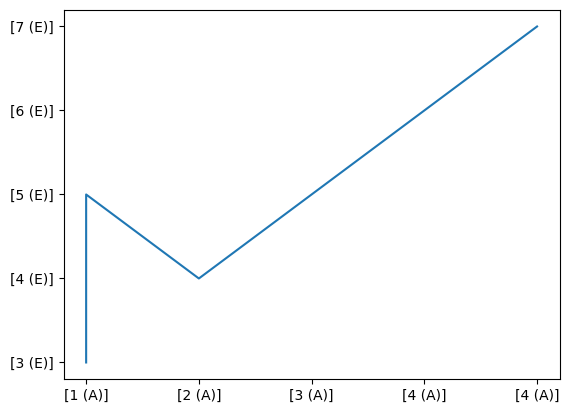

In [214]:
# ['Total Pasaportes Expedidos', 'Total Pasaportes Anulados']

df_5_f = df_5[['Total Pasaportes Expedidos', 'Total Pasaportes Anulados']].drop_duplicates() \
                                                                          .set_index('Total Pasaportes Anulados') \
                                                                          .sort_index()
df_5_f_p = df_5_f.plot(legend=False, xlabel='')
df_5_f_p.set_xticks(ticks=np.arange(1, 6))
df_5_f_p.set_yticks(ticks=np.arange(3, 8))
df_5_f_p.set_xticklabels(labels=['[1 (A)]', '[2 (A)]','[3 (A)]','[4 (A)]','[4 (A)]'])
df_5_f_p.set_yticklabels(labels=['[3 (E)]', '[4 (E)]','[5 (E)]','[6 (E)]','[7 (E)]'])

In [47]:
month = 5
year = 2024
path = f'{year}-{str(month).zfill(2)}'
path

'2024-05'